In [22]:
critics={
    'BTS':{'생일':5, '바울':4, '할로윈':1.5},
    '손흥민':{'바울':5, '할로윈':2},
    '조용필':{'생일':2.5, '바울':2, '할로윈':1},
    '나훈아':{'생일':3.5, '바울':4, '할로윈':5}
}

In [23]:
critics
# 손흥민이가 생일 영화를 봤다면 평점으로 몇점을 줄것인지 예측해보자
# 사용자 기반 CF 활용하여 구해보자

{'BTS': {'생일': 5, '바울': 4, '할로윈': 1.5},
 '손흥민': {'바울': 5, '할로윈': 2},
 '조용필': {'생일': 2.5, '바울': 2, '할로윈': 1},
 '나훈아': {'생일': 3.5, '바울': 4, '할로윈': 5}}

In [24]:
# collaborative filtering(CF) : 여러 사람들로부터 얻은 정보에 따라 각각의 사용자들의 관심사를 자동으로 예측
# 아이템 기반 : 데이터가 부족한 경우(사용자 수가 적을 때 사용)
# 사용자 기반 : 데이터가 있는 경우(일반적)

# critics['BTS']
# critics.get('BTS') # get 함수 : 키(BTS)가 존재할 경우에는 위 문장과 같은 의미로 해석

# critics['AOA'] # 키(AOA)가 존재하지 않아서 오류 발생
# print(critics.get('AOA')) # 오류발생 안하며, None이 출력됨

# critics라는 변수, get이라는 함수에도 .get을 써서 출력 가능
critics.get('BTS').get('할로윈')

1.5

In [25]:
# 거리를 구하여(피타고라스 정리) 두 사람간의 유사도 계산
# => 계산값이 작으면 작을수록, 두 사람간의 유사도 높다(거리가 가까우니까)
# 1) (x1,y1), (x2,y2)
# 거리 => ((x2-x1)제곱 +((y2-y1)제곱) 제곱근
    
    
# math : 수학 관련 다양한 함수들이 저장되어 있음
from math import sqrt
# 두점 사이의 거리 : sqrt(pow(3,2)+pow(1,2))
# 3의제곱 + 1의제곱의 합에 대한 제곱근을 취함

def sim(i,j): # sim : 두 점에 대한 좌표를 전달받아 각각의 축에 전달
    return sqrt(pow(i,2)+pow(j,2))
print(sim(3,1))



# 조용필와 손흥민 간의 거리 구하기
# ★★ 피타고라스는 x축과 y축, 2개의 데이터에서만 사용 가능!

#     'BTS':{'생일':5, '바울':4, '할로윈':1.5},
#     '손흥민':{'바울':5, '할로윈':2},

var1=critics['조용필']['바울']-critics['손흥민']['바울']  # -> x축
var2=critics['조용필']['할로윈']-critics['손흥민']['할로윈']  # -> y축
sim(var1,var2)

# [결과] 손흥민과 가까운 사람은 'BTS', 조용필과 나훈아와의 거리는 동일

3.1622776601683795


3.1622776601683795

In [26]:
# 손흥민과 다른 사람들과의 거리 구하기

for i in critics:
    if i != "손흥민": # 자기자신은 제외(나와 다른 사람간의 유사도를 구하므로)
        var1=critics[i]['바울']-critics['손흥민']['바울']
        var2=critics[i]['할로윈']-critics['손흥민']['할로윈']
#         print(i,"와 손흥민과의 거리 :",sim(var1,var2))
        print(i,"와 손흥민과의 유사도 :",1/(1+sim(var1,var2)))
        # 1/(1+sim(var1,var2) 값 => 0 : 낮, 1 : 높
        
        
# 컬럼별로 데이터의 포함범위가 다른 경우가 있음 (하나는 0~5점, 다른 하나는 0~10점 등등)
# 이런 경우에 '정규화' 또는 표준화' 필요!


# 축이 2개인 경우에만 거리를 구할 수 있다! 세 개 이상이면 불가!

BTS 와 손흥민과의 유사도 : 0.4721359549995794
조용필 와 손흥민과의 유사도 : 0.2402530733520421
나훈아 와 손흥민과의 유사도 : 0.2402530733520421


In [27]:
def sim_distance(data,name1,name2):
    sum=0
    for i in data[name1]: # 영화 제목이 i변수에 저장, {'생일':3.5, '바울':4, '할로윈':5}
        if i in data[name2]: # '같은 영화를 봤다면' 
#                               나훈아는 봤는데 손흥민은 '생일'이란 영화를 보지 않았음 => 결과값에서 제외
#             print(data[name1][i])
#             print(data[name2][i])
#             print("="*50)
            
            sum+=pow(data[name1][i]-data[name2][i],2)
        #for j in data[name2]: # 영화 제목이 j변수에 저장, {'바울':5, '할로윈':2},
          
            
    return 1/(1+sqrt(sum))
sim_distance(critics,"조용필",'손흥민') # 나훈아와 손흥민 간의 유클리드안 거리

# 1에 가까울수록 두 관계가 가까움, 0에 가까울수록 두 관계는 멀다

0.2402530733520421

In [35]:
# 딕셔너리 전체에서 가장 유사도가 큰 사람을 검색(상위 몇명 > index=3: 상위 3명: 디폴트값)

def top_match(data, name, index=3, sf=sim_distance):  # 함수 이름을 변수에 저장할 수 있음, 하위에 변수로 함수 호출가능
    myList=[]
    for i in data: # i에는 비교해야하는 대상들의 이름이 저장(딕셔너리의 키가 이름임)
        if name != i: #이름이 서로 같지 않다 > 손흥민 제외
            myList.append((sf(data, name, i),i)) # 3명의 유사도 값이 myList에 저장됨 / 수치(sf), 이름(i) 함께 저장
            # 2개의 수치이기 때문에 괄호 2개 
    myList.sort() # 오름차순
    myList.reverse() # 오름차순을 반대로 시행해서 내림차순
    return myList[:index]   # [:index] = [ :3]  상위 3명까지 출력


print(top_match(critics, '손흥민', 3))
# 손흥민을 제외한 나머지 사람들과의 유사도를 출력(내림차순 정렬) 

[(0.4721359549995794, 'BTS'), (0.2402530733520421, '조용필')]


In [3]:
from matplotlib import font_manager, rc
import platform
import matplotlib
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

In [83]:
import matplotlib.pyplot as plt
def myBar(score, names):
    s=range(len(score)) # 3사람, s= [0,1,2]
    plt.barh(s, score, height=0.5, color='r') # 0,점수 / 1, 점수 / 3, 점수
    plt.yticks(s,names) # 0~2, 이름 : y축 출력
    
    plt.xlabel("유사도")
    plt.ylabel("이름")
    plt.show()
    
    

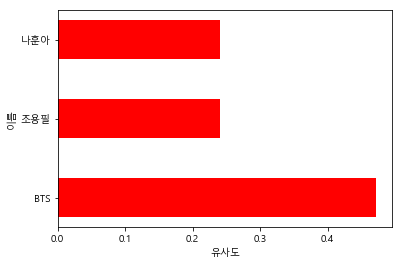

In [84]:
# top_match함수의 수행결과를 시각화
# x축에는 유사도, y축에는 이름, 수평 막대바로 출력
li=top_match(critics, '손흥민', 3)
score=[]
names=[]
for i in li:
    score.append(i[0])
    names.append(i[1])
myBar(score, names)

[0, 6, 0, 5]

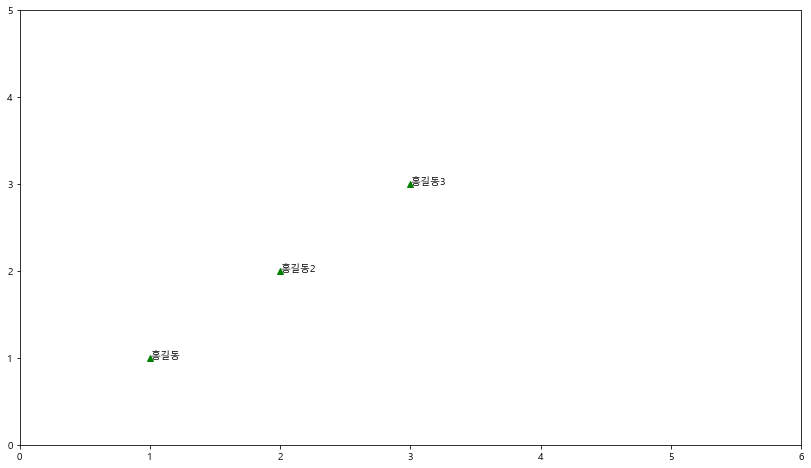

In [94]:
plt.figure(figsize=(14,8))
plt.plot([1,2,3],[1,2,3],'g^') #'g^' 초록색 삼각형 #(1,1), (2,2), (3,3) 앞에서부터 x,y
plt.text(1,1,"홍길동") # text!!! # 같은 위치에 이름
plt.text(2,2,"홍길동2")
plt.text(3,3,"홍길동3") 
plt.axis([0,6,0,5]) # axis 축을 직접 설정 #x축 0~6, y축 0~5

In [127]:
critics = {
    '조용필': {
        '택시운전사': 2.5,
        '겨울왕국': 3.5,
        '리빙라스베가스': 3.0,
        '넘버3': 3.5,
        '사랑과전쟁': 2.5,
        '세계대전': 3.0
    },
    'BTS': {
        '택시운전사': 1.0,
        '겨울왕국': 4.5,
        '리빙라스베가스': 0.5,
        '넘버3': 1.5,
        '사랑과전쟁': 4.5,
        '세계대전': 5.0
    },
    '블핑': {
        '택시운전사': 3.0,
        '겨울왕국': 3.5,
        '리빙라스베가스': 1.5,
        '넘버3': 5.0,
        '세계대전': 3.0,
        '인어공주': 3.5
    },
    '싸이': {
        '택시운전사': 2.5,
        '겨울왕국': 3.0,
        '넘버3': 3.5,
        '세계대전': 4.0
    },
    '장범준': {
        '겨울왕국': 3.5,
        '리빙라스베가스': 3.0,
        '세계대전': 4.5,
        '넘버3': 4.0,
        '사랑과전쟁': 2.5
    },
    '있지': {
        '택시운전사': 3.0,
        '겨울왕국': 4.0,
        '리빙라스베가스': 2.0,
        '넘버3': 3.0,
        
        
        
        
        '세계대전': 3.5,
        '사랑과전쟁': 2.0
    },
    '백지영': {
        '택시운전사': 3.0,
        '겨울왕국': 4.0,
        '세계대전': 3.0,
        '넘버3': 5.0,
        '사랑과전쟁': 3.5
    },
    '이은미': {'겨울왕국': 4.5, 
            '사랑과전쟁': 1.0,
             '넘버3': 4.0}
}

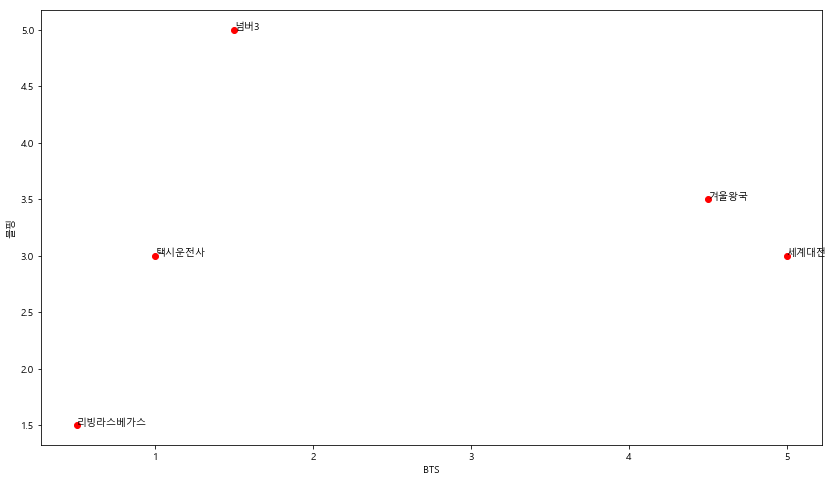

In [128]:
# 두 사람의 영화 평점 데이터를 시각화(스캐터 플롯)
def drawGraph(data, name1, name2):
    plt.figure(figsize=(14,8))  # 1008x576 > 72픽셀
    li=[] # BTS 영화 평점을 저장하기 위한 리스트
    li2=[] # 블핑 영화 평점을 저장하기 위한 리스트
    
    for i in data[name1]: # BTS가 본 영화(i)를 for in
        if i in data[name2]:   # 블핑이 봤다면  if
            li.append(data[name1][i]) # BTS가 본 영화의 평점이 추가
            li2.append(data[name2][i]) # BTS가 본 영화의 평점이 추가
            plt.text(data[name1][i], data[name2][i], i)
    
    
    plt.plot(li,li2,'ro')
    plt.xlabel(name1)
    plt.ylabel(name2)
  
    
    
drawGraph(critics,"BTS","블핑")

In [135]:
def sim_pearson(data, name1, name2):
    sumX=0       # X의 합(BTS와 블핑이 모두 본 영화에 대한 BTS 평점의 합) 
    sumY=0       # X의 합(BTS와 블핑이 모두 본 영화에 대한 블핑 평점의 합) 
    sumPowX=0    # X 제곱의 합
    sumPowY=0    # Y 제곱의 합
    sumXY=0      # X*Y의 합
    count=0      # 영화 개수
    
    for i in data[name1]: # BTS가 본 영화 제목
        if i in data[name2]: # 블핑도 봤다면        
            sumX+=data[name1][i]
            sumY+=data[name2][i]
            sumPowX+=pow(data[name1][i],2)
            sumPowY+=pow(data[name2][i],2)
            sumXY+=data[name1][i]*data[name2][i]
            count+=1
            
    return (sumXY-(sumX*sumY)/count) / sqrt((sumPowX-pow(sumX,2)/count) * (sumPowY-pow(sumY,2)/count))    

0.15430334996209194

In [137]:
def top_match(data, name, index=3, sf=sim_pearson):  # 함수 이름을 변수에 저장할 수 있음, 하위에 변수로 함수 호출가능
    myList=[]
    for i in data: # i에는 비교해야하는 대상들의 이름이 저장(딕셔너리의 키가 이름임)
        if name != i: #이름이 서로 같지 않다 > 손흥민 제외
            myList.append((sf(data, name, i),i)) # 3명의 유사도 값이 myList에 저장됨 / 수치(sf), 이름(i) 함께 저장
            # 2개의 수치이기 때문에 괄호 2개 
    myList.sort() # 오름차순
    myList.reverse() # 오름차순을 반대로 시행해서 내림차순
    return myList[:index]   # [:index] = [ :3]  상위 3명까지 출력


In [141]:
# sim_person(critics, "BTS", "장범준")
top_match(critics, "싸이", 7)


[(1.0, '장범준'),
 (0.5692099788303083, 'BTS'),
 (0.40451991747794525, '조용필'),
 (0.20459830184114206, '블핑'),
 (0.13483997249264842, '있지'),
 (0.13483997249264842, '백지영'),
 (-1.0, '이은미')]

#### 예상평점 = 상관계수 * 상대방의 영화평점
> * 2.4 = 0.6 * 4                     (60%의 유사도를 갖는다)
* 5 = 1 * 5 
* 7.4 / 2 = 3.7 (예상평점 2개의 합 나누기 2)